# Loans interest rates prediction

In this part we will try to predict loans interest rates. We will use simple linear regresion and machine learning models to serach for the best resuls.

To improve features, we will incorporate USA federal interest rates on monthly basis the loan was issued. Loans interest rates consists of variuos parts, one of the is federal interest rates, this should add additional information of the market situation.

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go
import math

import statsmodels.api as sm
import scipy.stats.distributions as dist
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from generic_functions import value_counts_to_dataframe, pivot_dim2
from modelling_functions import fit_model, kfold_cross_validation

# balancing dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import shapiro 
from scipy.stats import lognorm
from scipy.stats import kstest


from sklearn import model_selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import precision_recall_curve


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.pipeline import Pipeline

from scipy.stats import reciprocal, uniform

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

os.getcwd()

'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3'

# Train, test data loading

In [52]:
path_train = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_int_rates/x_train.csv'
path_test = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_int_rates/x_test.csv'
path_ytrain = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_int_rates/y_train.csv'
path_ytest = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/output_int_rates/y_test.csv'


x_train = pd.read_csv(path_train)
y_train = pd.read_csv(path_ytrain)
x_test = pd.read_csv(path_test)
y_test = pd.read_csv(path_ytest)
x_train.head(3)

,fed_int_rates,loan_amnt,funded_amnt,loan_status,IsLoanAccepted,installment,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,term,grade,sub_grade,emp_length,home_ownership_ord,verification_status_ord,addr_state_ord,application_type_ord,purpose_mod,ohe__home_ownership_ANY,ohe__home_ownership_MORTGAGE,ohe__home_ownership_NONE,ohe__home_ownership_OWN,ohe__home_ownership_RENT,ohe__verification_status_NotVerified,ohe__verification_status_SourceVerified,ohe__verification_status_Verified,ohe__purpose_car,ohe__purpose_credit_card,ohe__purpose_debt_consolidation,ohe__purpose_educational,ohe__purpose_home_improvement,ohe__purpose_house,ohe__purpose_major_purchase,ohe__purpose_medical,ohe__purpose_moving,ohe__purpose_other,ohe__purpose_renewable_energy,ohe__purpose_small_business,ohe__purpose_vacation,ohe__addr_state_AK,ohe__addr_state_AL,ohe__addr_state_AR,ohe__addr_state_AZ,ohe__addr_state_CA,ohe__addr_state_CO,ohe__addr_state_CT,ohe__addr_state_DC,ohe__addr_state_DE,ohe__addr_state_FL,ohe__addr_state_GA,ohe__addr_state_HI,ohe__addr_state_ID,ohe__addr_state_IL,ohe__addr_state_IN,ohe__addr_state_KS,ohe__addr_state_KY,ohe__addr_state_LA,ohe__addr_state_MA,ohe__addr_state_MD,ohe__addr_state_ME,ohe__addr_state_MI,ohe__addr_state_MN,ohe__addr_state_MO,ohe__addr_state_MS,ohe__addr_state_MT,ohe__addr_state_NC,ohe__addr_state_ND,ohe__addr_state_NE,ohe__addr_state_NH,ohe__addr_state_NJ,ohe__addr_state_NM,ohe__addr_state_NV,ohe__addr_state_NY,ohe__addr_state_OH,ohe__addr_state_OK,ohe__addr_state_OR,ohe__addr_state_PA,ohe__addr_state_RI,ohe__addr_state_SC,ohe__addr_state_SD,ohe__addr_state_TN,ohe__addr_state_TX,ohe__addr_state_UT,ohe__addr_state_VA,ohe__addr_state_VT,ohe__addr_state_WA,ohe__addr_state_WI,ohe__addr_state_WV,ohe__addr_state_WY,ohe__application_type_Individual,ohe__application_type_JointApp
0,1.04,24000.0,24000.0,1.0,1,891.93,110000.0,24.63,680.0,684.0,0.0,12.0,1.0,19982.0,69.9,0.0,3.0,18.0,2,1.0,1.0,24.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.65,15000.0,15000.0,1.0,1,494.57,120000.0,17.98,665.0,669.0,0.0,13.0,0.0,15210.0,80.5,0.0,1.0,9.0,7,4.0,1.0,19.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.16,12000.0,12000.0,1.0,1,407.75,160000.0,25.06,700.0,704.0,0.0,21.0,0.0,42650.0,58.6,0.0,2.0,11.0,10,1.0,1.0,33.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Features selection for the linear regresion model:

In [3]:
lm_columns = ['fed_int_rates','loan_amnt','funded_amnt','loan_status','IsLoanAccepted',
           'installment','annual_inc','dti','fico_range_low',
           'fico_range_high','inq_last_6mths',
           'open_acc','pub_rec','revol_bal','revol_util',
            'term','grade','sub_grade','emp_length',
           'home_ownership_ord','verification_status_ord',
           'addr_state_ord','application_type_ord','purpose_mod']

x_train_lm = x_train[lm_columns]
x_test_lm = x_test[lm_columns]
y_train_lm = y_train
y_test_lm = y_test

# Linear regresion

## With all features

In [85]:
%%time
#add constant to predictor variables
x_train_lm = sm.add_constant(x_train_lm)

#fit linear regression model
model = sm.OLS(y_train_lm, x_train_lm).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 9.746e+05
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:07:31   Log-Likelihood:            -3.4265e+05
No. Observations:              328893   AIC:                         6.853e+05
Df Residuals:                  328873   BIC:                         6.855e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

<b>Highlight:</b>
The model quality is very hight R^2 = 0.983. Which means that indepened variables combination explains ~98% of the dependent variable.

Let's check the residuals normality, which is one of the good model conditions, which should be met. We will use the QQ plot for this. Normally distributed residuals should be distributed among the diagonal.

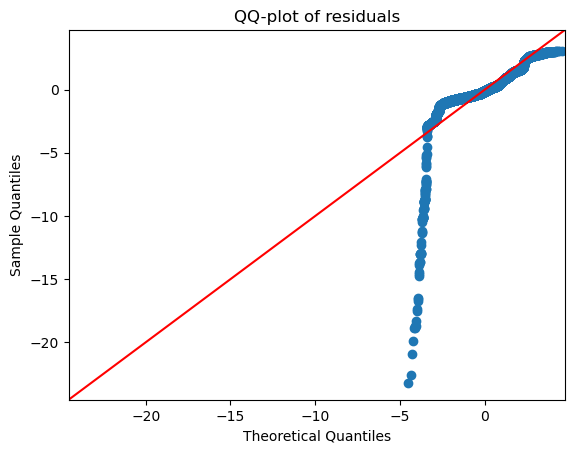

In [83]:
sm.qqplot(model.resid, line ='45')
plt.title('QQ-plot of residuals')
plt.show()

The residuals looks strange. Part of the residuals are distributed among the diagonal, but other part is ay off it. This might indicate that model is not that qualitative.

We have seen that some features p-values are > 0.05, this features might be insignificant and should be eliminated from the model.

There was this features with p-value > 0.05 and we will eliminate them:
- loan_status (0.486)
- funded_amnt (0.414)
- loan_amnt (0.41)
- addr_state_ord (0.191)
- pub_rec (0.084)

In [86]:
%%time

# fitted values
model_fitted_y = pd.DataFrame(model.fittedvalues, columns=['int_rate_fitted'])
model_fitted_y.head(3)

CPU times: user 66.3 ms, sys: 32.9 ms, total: 99.2 ms
Wall time: 20.9 ms


,int_rate_fitted
0,19.941601
1,11.839437
2,14.163226


In [88]:
df = pd.concat([y_train_lm, model_fitted_y],axis=1)
df[['int_rate','int_rate_fitted']].head(3)

,int_rate,int_rate_fitted
0,20.00,19.941601
1,11.49,11.839437
2,13.59,14.163226


In [89]:
MAE = metrics.mean_absolute_error(df.int_rate,df.int_rate_fitted)
MSE = metrics.mean_squared_error(df.int_rate,df.int_rate_fitted)
RMSE = np.sqrt(metrics.mean_squared_error(df.int_rate,df.int_rate_fitted))

ols_metrics = {
        'model_name': 'OLS',
        'MAE': MAE,
        'MSE': MSE,
        'RMSE': RMSE
        }
ols_metrics

{'model_name': 'OLS',
 'MAE': 0.5039411034871624,
 'MSE': 0.4703702807240029,
 'RMSE': 0.6858354618448967}

## Only significant features

In [90]:
lm_columns = ['fed_int_rates','IsLoanAccepted',
           'installment','annual_inc','dti','fico_range_low',
           'fico_range_high','inq_last_6mths',
           'open_acc','revol_bal','revol_util',
            'term','grade','sub_grade','emp_length',
           'home_ownership_ord','verification_status_ord',
           'application_type_ord','purpose_mod']

x_train_lm = x_train[lm_columns]
x_test_lm = x_test[lm_columns]
x_train_lm.head(2)

,fed_int_rates,IsLoanAccepted,installment,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,term,grade,sub_grade,emp_length,home_ownership_ord,verification_status_ord,application_type_ord,purpose_mod
0,1.04,1,891.93,110000.0,24.63,680.0,684.0,0.0,12.0,19982.0,69.9,0.0,3.0,18.0,2,1.0,1.0,0.0,0
1,0.65,1,494.57,120000.0,17.98,665.0,669.0,0.0,13.0,15210.0,80.5,0.0,1.0,9.0,7,4.0,1.0,0.0,0


In [91]:
%%time

#add constant to predictor variables
x_train_lm = sm.add_constant(x_train_lm)

#fit linear regression model
model = sm.OLS(y_train_lm, x_train_lm).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 9.746e+05
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        20:10:02   Log-Likelihood:            -3.4265e+05
No. Observations:              328893   AIC:                         6.853e+05
Df Residuals:                  328873   BIC:                         6.855e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Now all the features are significant in the model, all p-values are less then 0.05. R^2 remains high 0.983.

In [92]:
df = pd.concat([y_train_lm, x_train_lm],axis=1)
df.head(3)

,int_rate,const,fed_int_rates,IsLoanAccepted,installment,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_bal,revol_util,term,grade,sub_grade,emp_length,home_ownership_ord,verification_status_ord,application_type_ord,purpose_mod
0,20.00,1.0,1.04,1,891.93,110000.0,24.63,680.0,684.0,0.0,12.0,19982.0,69.9,0.0,3.0,18.0,2,1.0,1.0,0.0,0
1,11.49,1.0,0.65,1,494.57,120000.0,17.98,665.0,669.0,0.0,13.0,15210.0,80.5,0.0,1.0,9.0,7,4.0,1.0,0.0,0
2,13.59,1.0,1.16,1,407.75,160000.0,25.06,700.0,704.0,0.0,21.0,42650.0,58.6,0.0,2.0,11.0,10,1.0,1.0,0.0,1


We will extracted fitted values

In [93]:
%%time

# fitted values
model_fitted_y = pd.DataFrame(model.fittedvalues, columns=['int_rate_fitted'])
model_fitted_y.head(3)

CPU times: user 70.5 ms, sys: 3.34 ms, total: 73.9 ms
Wall time: 11.9 ms


,int_rate_fitted
0,19.941601
1,11.839437
2,14.163226


The model residuals will be:

In [94]:
mod_res = pd.DataFrame(model.resid,columns=['residuals'])
mod_res.head(3)

,residuals
0,0.058399
1,-0.349437
2,-0.573226


We will merge fitted values and residuals to the single dataframe with target and features

In [95]:
df = pd.concat([df, model_fitted_y,mod_res],axis=1)
df[['int_rate','int_rate_fitted','residuals']].head(3)

,int_rate,int_rate_fitted,residuals
0,20.00,19.941601,0.058399
1,11.49,11.839437,-0.349437
2,13.59,14.163226,-0.573226


In [96]:
MAE = metrics.mean_absolute_error(df.int_rate,df.int_rate_fitted)
MSE = metrics.mean_squared_error(df.int_rate,df.int_rate_fitted)
RMSE = np.sqrt(metrics.mean_squared_error(df.int_rate,df.int_rate_fitted))

ols_sig_metrics = {
        'model_name': 'OLS significant',
        'MAE': MAE,
        'MSE': MSE,
        'RMSE': RMSE
        }


{'model_name': 'OLS significant',
 'MAE': 0.5039411034871624,
 'MSE': 0.4703702807240029,
 'RMSE': 0.6858354618448967}

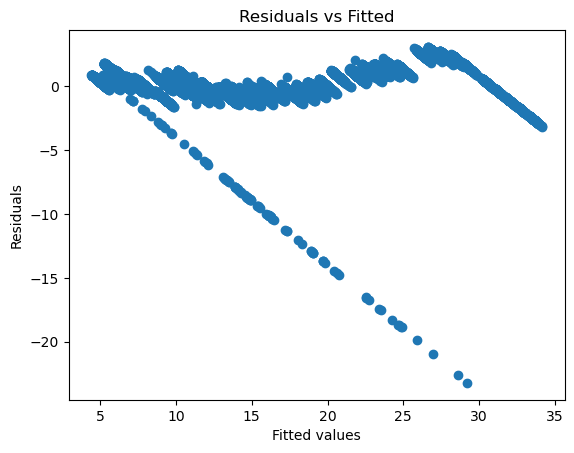

In [97]:
plt.scatter(df['int_rate_fitted'], df['residuals'])
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

plt.show()

In [98]:
df[['residuals']].sort_values(by='residuals',ascending = True).head(10)

,residuals
322395,-23.228248
118541,-22.582990
207195,-20.934070
322651,-19.888185
314355,-18.883933
259252,-18.857746
313377,-18.723421
182961,-18.682558
77479,-18.282049
300218,-17.502827


There are three primary metrics used to evaluate linear models. These are: 
- Mean absolute error (MAE), 
- Mean squared error (MSE), 
- or Root mean squared error (RMSE)

We will calculate all of them to check the model quality

In [99]:
MAE = metrics.mean_absolute_error(df.int_rate,df.int_rate_fitted)
MSE = metrics.mean_squared_error(df.int_rate,df.int_rate_fitted)
RMSE = np.sqrt(metrics.mean_squared_error(df.int_rate,df.int_rate_fitted))

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

MAE: 0.5039411034871624
MSE: 0.4703702807240029
RMSE: 0.6858354618448967


In [100]:
round(df[['residuals']].describe(),5)

,residuals
count,328893.00000
mean,0.00000
std,0.68584
min,-23.22825
25%,-0.45779
50%,-0.13393
75%,0.30556
max,3.08094


In [101]:
print('Residuals quantiles:')
print('5th: ',np.quantile(df.residuals,0.05))
print('90th:',np.quantile(df.residuals,0.90))
print('95th:',np.quantile(df.residuals,0.95))
print('98th:',np.quantile(df.residuals,0.98))
print('99th:',np.quantile(df.residuals,0.99))

Residuals quantiles:
5th:  -0.7669836232089433
90th: 0.9396037126747252
95th: 1.3429932385955325
98th: 1.579345086697697
99th: 2.191098665329537


Shapiro-Wilk test for normality:

In [102]:
shapiro(df.residuals)

ShapiroResult(statistic=0.878961443901062, pvalue=0.0)

Since the p-value is less than 0.05, we reject the null hypothesis of the Shapiro-Wilk test.
This means we have sufficient evidence to say that the model residuals does not come from a normal distribution.

Kolmogorov-Smirnov test:

In [103]:
kstest(df.residuals, 'norm')

KstestResult(statistic=0.17167212263513398, pvalue=0.0, statistic_location=-0.7726317687130084, statistic_sign=-1)

Since the p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test. This means we have sufficient evidence to say that residuals does not come from a normal distribution.

## Linear regresion from ML models

In [104]:
%%time
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

CPU times: user 6.29 s, sys: 195 ms, total: 6.48 s
Wall time: 1.19 s


In [105]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean Squared Error = ', mse)
print('R2 Score = ', r_squared)

Mean Squared Error =  0.46355102260904035
R2 Score =  0.9828696884642393


In [106]:
df = pd.concat([y_test, pd.DataFrame(y_pred, columns = ['int_rate_pred'])],axis=1)
df['res'] = df.int_rate - df.int_rate_pred
df.head(3)

,int_rate,int_rate_pred,res
0,15.05,15.556441,-0.506441
1,14.08,15.111622,-1.031622
2,7.35,7.088190,0.261810


In [107]:
MAE = metrics.mean_absolute_error(df.int_rate,df.int_rate_pred)
MSE = metrics.mean_squared_error(df.int_rate,df.int_rate_pred)
RMSE = np.sqrt(metrics.mean_squared_error(df.int_rate,df.int_rate_pred))

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

lr_metrics = {
        'model_name': 'Linear Regresion',
        'MAE': MAE,
        'MSE': MSE,
        'RMSE': RMSE
        }
lr_metrics

MAE: 0.48947052920201883
MSE: 0.46355102260904035
RMSE: 0.6808458141231687


{'model_name': 'Linear Regresion',
 'MAE': 0.48947052920201883,
 'MSE': 0.46355102260904035,
 'RMSE': 0.6808458141231687}

In [108]:
round(df[['res']].describe(),5)

,res
count,82224.00000
mean,0.00434
std,0.68084
min,-24.87573
25%,-0.43722
50%,-0.10356
75%,0.29820
max,33.41573


# Random Forest Regressor

In [109]:
%%time
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

CPU times: user 3min 8s, sys: 292 ms, total: 3min 8s
Wall time: 3min 9s


In [110]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean Squared Error = ', mse)
print('R2 Score = ', r_squared)

Mean Squared Error =  0.056753243894968934
R2 Score =  0.997902710378862


In [111]:
df = pd.concat([y_test, pd.DataFrame(y_pred, columns = ['int_rate_pred'])],axis=1)
df['res'] = df.int_rate - df.int_rate_pred
df.head(3)

,int_rate,int_rate_pred,res
0,15.05,15.0500,1.740830e-13
1,14.08,14.0467,3.330000e-02
2,7.35,7.3710,-2.100000e-02


In [112]:
MAE = metrics.mean_absolute_error(df.int_rate,df.int_rate_pred)
MSE = metrics.mean_squared_error(df.int_rate,df.int_rate_pred)
RMSE = np.sqrt(metrics.mean_squared_error(df.int_rate,df.int_rate_pred))

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

rf_metrics = {
        'model_name': 'Random Forest',
        'MAE': MAE,
        'MSE': MSE,
        'RMSE': RMSE
        }

MAE: 0.02020308425804879
MSE: 0.056753243894968934
RMSE: 0.23822939343197963


In [113]:
round(df[['res']].describe(),5)

,res
count,82224.00000
mean,0.00110
std,0.23823
min,-24.89000
25%,-0.00000
50%,0.00000
75%,0.00000
max,5.59800


# Gradient Boosting Regressors

In [114]:
%%time
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(x_train, y_train)
y_pred = gb_model.predict(x_test)

CPU times: user 1min 12s, sys: 165 ms, total: 1min 12s
Wall time: 1min 12s


In [115]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean Squared Error = ', mse)
print('R2 Score = ', r_squared)

Mean Squared Error =  0.06594380479683712
R2 Score =  0.9975630774932495


In [116]:
df = pd.concat([y_test, pd.DataFrame(y_pred, columns = ['int_rate_pred'])],axis=1)
df['res'] = df.int_rate - df.int_rate_pred
df.head(3)

,int_rate,int_rate_pred,res
0,15.05,15.017172,0.032828
1,14.08,14.044171,0.035829
2,7.35,7.402402,-0.052402


In [117]:
MAE = metrics.mean_absolute_error(df.int_rate,df.int_rate_pred)
MSE = metrics.mean_squared_error(df.int_rate,df.int_rate_pred)
RMSE = np.sqrt(metrics.mean_squared_error(df.int_rate,df.int_rate_pred))

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

gbm_metrics = {
        'model_name': 'Gradient Boosting',
        'MAE': MAE,
        'MSE': MSE,
        'RMSE': RMSE
        }

MAE: 0.09594164357342333
MSE: 0.06594380479683712
RMSE: 0.2567952585170472


In [118]:
round(df[['res']].describe(),5)

,res
count,82224.00000
mean,0.00018
std,0.25680
min,-24.89777
25%,-0.04408
50%,0.00769
75%,0.04300
max,0.87877


# Decision Tree Regressor

In [121]:
%%time
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

CPU times: user 3.54 s, sys: 128 ms, total: 3.67 s
Wall time: 3.78 s


In [122]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean Squared Error = ', mse)
print('R2 Score = ', r_squared)

Mean Squared Error =  0.09884263475384233
R2 Score =  0.9963473165978176


In [123]:
df = pd.concat([y_test, pd.DataFrame(y_pred, columns = ['int_rate_pred'])],axis=1)
df['res'] = df.int_rate - df.int_rate_pred
df.head(3)

,int_rate,int_rate_pred,res
0,15.05,15.05,-6.981082e-13
1,14.08,13.99,9.000000e-02
2,7.35,7.35,-8.881784e-16


In [124]:
MAE = metrics.mean_absolute_error(df.int_rate,df.int_rate_pred)
MSE = metrics.mean_squared_error(df.int_rate,df.int_rate_pred)
RMSE = np.sqrt(metrics.mean_squared_error(df.int_rate,df.int_rate_pred))

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

dt_metrics = {
        'model_name': 'Decision Tree',
        'MAE': MAE,
        'MSE': MSE,
        'RMSE': RMSE
        }

MAE: 0.017760751119561713
MSE: 0.09884263475384233
RMSE: 0.3143924852057414


In [125]:
round(df[['res']].describe(),5)

,res
count,82224.00000
mean,0.00056
std,0.31439
min,-24.89000
25%,-0.00000
50%,-0.00000
75%,0.00000
max,18.85000


# Results comparison

In [145]:
df_res = pd.concat([pd.DataFrame.from_dict([ols_metrics]), 
                    pd.DataFrame.from_dict([ols_sig_metrics]),
                    pd.DataFrame.from_dict([lr_metrics]),
                    pd.DataFrame.from_dict([rf_metrics]),
                    pd.DataFrame.from_dict([gbm_metrics]),
                    pd.DataFrame.from_dict([dt_metrics])
                   ],axis=0).reset_index().drop(columns=['index'])
df_res
# pd.DataFrame.from_dict([ols_metrics])

,model_name,MAE,MSE,RMSE
0,OLS,0.503941,0.470370,0.685835
1,OLS significant,0.503941,0.470370,0.685835
2,Linear Regresion,0.489471,0.463551,0.680846
3,Random Forest,0.020203,0.056753,0.238229
4,Gradient Boosting,0.095942,0.065944,0.256795
5,Decision Tree,0.017761,0.098843,0.314392


# Conclusion

- Based on the models quality metrics like MAE, MSE and RMSE the best performing model was Random foreset and Decision tree.
- The second best model was Gradient Boosting.
- Even clasical linear regresion models had high R^2 results, but based on the error rates ML models performed better.